# Trabajo Práctico N°1 : Matrices Insumo - Producto

### Consigna 1. Analizar que sucede con la solucion del sistema 2 en cada uno de los casos.

a) Cuando $I - A$ **es inversible**, el sistema tiene única solución, es decir, existe un único vector $p$ donde las componentes son el total producido de cada producto.

b) Si $I - A$ **es inversible** y **$d = 0$**, la única solución a $(I - A)p = 0$ es $p = 0$, lo que significa que no hay producción en ningún sector. Esto ocurre porque no hay demanda externa para iniciar la producción, y la estructura de las interdependencias (representada por $A$) no es suficiente para sostener la producción sin demanda externa.

c) Si **$d$ es distinto de $0$** y $I − A$ **no es inversible**, significa que la matriz es singular, lo que implica que el sistema tiene infinitas soluciones o ninguna solución.

- Infinitas soluciones: Esto ocurre si algunos productos pueden ser producidos de diferentes maneras, lo que implica múltiples combinaciones posibles para satisfacer la demanda.


- Sin solución: Esto ocurre si el sistema es inconsistente, es decir, la demanda no puede ser satisfecha con la capacidad productiva del sistema, o las interdependencias son tales que no es posible encontrar una combinación de producciones que satisfaga la demanda.

d) Si **$d = 0$** y $I - A$ **no es inversible**, se trata de un sistema homogéneo, y existe una solución no trivial para $p$, lo que implica que la producción puede continuar solo debido a las relaciones internas entre los sectores, incluso sin demanda externa. Esto indicaría que los sectores están tan interconectados que pueden sostenerse mutuamente, produciendo bienes e intercambiándolos entre sí sin una demanda externa.

In [4]:
from funciones import *

### Consigna 3.

Resolvemos el sistema: $$p = (I-A)^{-1} d = Ld$$ utilizando la funcion *resolver_sistema_2()*.

In [5]:
def resolver_sistema_2(A,d):
    """
    Función que calcula la produccion p necesaria de cada sector para satisfacer
    la demanda d de la economia representada en la matriz A
    
    Parámetros
    ----------
      A: matriz de consumo R^(nxn) 
      d: vector de demanda externa para una economia abierta
    Returns
    -------
    P: vector de produccion necesaria para satisfacer la demanda d
    
    """
    n= A.shape[0]
    Id = np.eye(n)
    matriz = Id - A
    L,U,P = calcular_LU(matriz)
    matriz_inv = inversa_LU(L,U,P)
    p = np.dot(matriz_inv, d.T) 

    return p

In [6]:
A= np.array([[0.3, 0.0, 0.1],[0.05, 1.0, 0.2],[0.1, 0.15, 0.1]]) #definimos A 
d= np.array([[100, 100, 300]])    #definimos d

P = resolver_sistema_2(A, d) #p a partir de implementar la funcion
matriz = np.eye(3) - A
num_condicion = np.linalg.cond(matriz) #condicion de I-A

print("Vector de producción P: \n", P)
print("Número de condición de la matriz (I-A): \n", num_condicion)

Vector de producción P: 
 [[   68.94409938]
 [-5151.39130435]
 [ -517.39130435]]
Número de condición de la matriz (I-A): 
 28.802983736360943


El vector encontrado para la producción $P$ es

$$P = 
\begin{pmatrix}1
73.844 \\
-4853.462 \\
-483.092
\end{pmatrix} $$

el cual **no tiene sentido en términos económicos**, ya que los valores de $P$ representan los niveles de producción necesarios en cada sector para satisfacer tanto la demanda interna como la demanda externa. El resultado obtenido contiene valores negativos en $p_2$ y $p_3$, lo cual es **físicamente imposible en la economía real**.

La matriz $(I - A)$ está **mal condicionada**, con un número de condición de 28.80, lo que provoca que la inversión de la matriz no sea estable numéricamente, dando lugar a soluciones extremadamente grandes o incluso valores negativos. Esto podría ser una indicación de que la economía modelada **no tiene una solución factible** para los valores dados de $A$ y $d$.


### Consigna 4. 

El nivel de produccion asociado a la demanda inicial es $P = L d$, donde $L$ es la inversa de $I-A$. Ahora, si la demanda sobre el tercer sector **aumenta en 1 unidad**, obtenemos una nueva demanda\
\
\
$$d'=
\begin{pmatrix}
d1\\
d2\\
d3 + 1
\end{pmatrix}$$\
\
\
El nivel de producción correspondiente a esta nueva demanda es:\
\
\
$$P' = L d'$$ 
\
\
Entonces la **variacion en la producción** se obtiene de la siguente manera:\
\
\
$$∆P = P' - P\\
\
\
= L d' - L d\
\
\
= L \left(\begin{pmatrix}
d1\\
d2\\
d3 + 1
\end{pmatrix}
- 
\begin{pmatrix}
d1\\
d2\\
d3
\end{pmatrix}\right)\\
=
L\begin{pmatrix}
0\\
0\\
1
\end{pmatrix}
= L∆d$$\
\
\
Si llamamos $l_{ij}$ a los coeficientes de L, el resultado sera:\
\
\
$$∆P= L∆d=
\begin{pmatrix}
l_{13}\\
l_{23}\\
l_{33}
\end{pmatrix}$$\
\
\
Es decir, la tercera columna de la matriz de L.     
    
Esto significa que:

El la producción en el sector 1 aumenta en $l_{13}$ unidades, la producción en el sector 2 aumenta en $l_{23}$ unidades y la producción del sector 3 aumenta en $l_{33}$ unidades.    
Este resultado muestra el efecto directo (incremento en el tercer sector) y los efectos indirectos (incrementos en los sectores 1 y 2 debido a su dependencia del tercer sector) en la produccion total.

### Consigna 5. 

 Encontrar los coeficientes técnicos de $A$ y la matriz de Leontief para la economia propuesta.

#### Coeficientes tecnicos de $A$:
Sabemos que:

$$P=
\begin{pmatrix}
1000 & 0 & 0 \\
0 & 500 & 0 \\
0 & 0 & 1000
\end{pmatrix}$$\
\
\
Es la matriz que tiene en su diagonal el total producido de cada sector.

In [7]:
p = np.array([[1000,0,0],[0,500,0],[0,0,1000]])

Utilizando la funcion *inversa_LU( )* calculamos la matriz $P^{-1}$.

In [8]:
L, U, P = calcular_LU(p)
inversa_p = inversa_LU(L, U, P)
inversa_p

array([[0.001, 0.   , 0.   ],
       [0.   , 0.002, 0.   ],
       [0.   , 0.   , 0.001]])

$$P^{-1}=
\begin{pmatrix}
0.001 & 0 & 0 \\
0 & 0.002 & 0 \\
0 & 0 & 0.001
\end{pmatrix}$$

Ademas, 
$$Z=
\begin{pmatrix}
350 & 0 & 0 \\
50 & 250 & 150 \\
200 & 150 & 550
\end{pmatrix}$$\
\
\
Es la matriz de flujo de capitales entre sectores de la economía.

Empleando la ecuación tenemos que:
\
\
$$A=ZP^{-1} = 
\begin{pmatrix}
350 & 0 & 0 \\
50 & 250 & 150 \\
200 & 150 & 550
\end{pmatrix}
\begin{pmatrix}
0.001 & 0 & 0 \\
0 & 0.002 & 0 \\
0 & 0 & 0.001
\end{pmatrix}$$

In [9]:
Z = np.array([[350,0,0],[50,250,150],[200,150,550]])
A = Z @ inversa_p
A

array([[0.35, 0.  , 0.  ],
       [0.05, 0.5 , 0.15],
       [0.2 , 0.3 , 0.55]])

Finalmente, la matriz $A$ para la economía dada es:

$$A=
\begin{pmatrix}
0.35 & 0 & 0 \\
0.05 & 0.5 & 0.15 \\
0.2 & 0.3 & 0.55
\end{pmatrix}$$

#### Matriz de Leontief:

La matriz de Leontief $L$ se obtiene a partir de la fórmula:\
\
\
$$L = (I - A)^{-1}$$\
\
\
Entonces:\
\
\
$$L=
\left(\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} 
-
\begin{pmatrix}
0.35 & 0 & 0 \\
0.05 & 0.5 & 0.15 \\
0.2 & 0.3 & 0.55
\end{pmatrix}\right)^{-1}$$





In [10]:
Leontieff = np.eye(3) - A
Leontieff

array([[ 0.65,  0.  ,  0.  ],
       [-0.05,  0.5 , -0.15],
       [-0.2 , -0.3 ,  0.45]])

$$L=
\begin{pmatrix}
0.65 & 0 & 0 \\
-0.05 & 0.5 & -0.15 \\
-0.2 & -0.3 & 0.45
\end{pmatrix}^{-1}$$




In [11]:
L, U, P = calcular_LU(Leontieff)
inversa_L = inversa_LU(L,U,P)
inversa_L

array([[1.53846154, 0.        , 0.        ],
       [0.44916667, 2.5       , 0.83333333],
       [0.98388889, 1.66666667, 2.77777778]])

Finalmente, utilizamos *inversa_LU* para calcular $L$\
\
\
$$L=
\begin{pmatrix}
1.53846154 & 0 & 0 \\
0.44871795 & 2.5 & 0.83333333 \\
0.98290598 & 1.66666667 & 2.77777778
\end{pmatrix}$$

### Consigna 6


Partimos de la ecuación original:

\begin{equation}
\begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix}
\begin{pmatrix}
p^r \\
p^s
\end{pmatrix}
-
\begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix}
\begin{pmatrix}
p^r \\
p^s
\end{pmatrix}
=
\begin{pmatrix}
d^r \\
d^s
\end{pmatrix}
\end{equation}

Ahora consideramos las variaciones $∆p$ y $∆d$ (ya que como agregamos una variación en la demanda esto implica una variación en la producción):

\begin{equation}
\begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix}
\begin{pmatrix}
p^r + \Delta p^r \\
p^s + \Delta p^s
\end{pmatrix}
-
\begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix}
\begin{pmatrix}
p^r + \Delta p^r \\
p^s + \Delta p^s
\end{pmatrix}
=
\begin{pmatrix}
d^r + \Delta d^r \\
d^s + \Delta d^s
\end{pmatrix}
\end{equation}

Desarrollamos los productos de matrices y agrupamos términos (los productos de matrices por bloques son realizables porque coinciden las dimensiones de las filas de un bloque con las columnas del bloque con el que hay que realizar la multiplicación):


\begin{equation}
\begin{pmatrix}
p^r + \Delta p^r \\
p^s + \Delta p^s
\end{pmatrix}
-
\begin{pmatrix}
A^{rr}(p^r + \Delta p^r) + A^{rs}(p^s + \Delta p^s) \\
A^{sr}(p^r + \Delta p^r) + A^{ss}(p^s + \Delta p^s)
\end{pmatrix}
=
\begin{pmatrix}
d^r + \Delta d^r \\
d^s + \Delta d^s
\end{pmatrix}
\end{equation}

Agrupamos términos:

\begin{equation}
\begin{pmatrix}
p^r - A^{rr}p^r - A^{rs}p^s + \Delta p^r - A^{rr}\Delta p^r - A^{rs}\Delta p^s \\
p^s - A^{sr}p^r - A^{ss}p^s + \Delta p^s - A^{sr}\Delta p^r - A^{ss}\Delta p^s
\end{pmatrix}
=
\begin{pmatrix}
d^r + \Delta d^r \\
d^s + \Delta d^s
\end{pmatrix}
\end{equation}

Dado que de la ecuacion original teniamos:


\begin{equation}
\begin{pmatrix}
p^r - A^{rr}p^r - A^{rs}p^s \\
p^s - A^{sr}p^r - A^{ss}p^s
\end{pmatrix}
=
\begin{pmatrix}
d^r \\
d^s
\end{pmatrix}
\end{equation}


Se la restamos a la ecuación con variaciones(para cancelar los $p^s$, $p^r$, $d^s$ y $d^r$) y resulta:

\begin{equation}
\begin{pmatrix}
\Delta p^r - A^{rr}\Delta p^r - A^{rs}\Delta p^s \\
\Delta p^s - A^{sr}\Delta p^r - A^{ss}\Delta p^s
\end{pmatrix}
=
\begin{pmatrix}
\Delta d^r \\
\Delta d^s
\end{pmatrix}
\end{equation}

Asumimos que $∆d = 0$:

\begin{equation}
\begin{pmatrix}
\Delta p^r - A^{rr}\Delta p^r - A^{rs}\Delta p^s \\
\Delta p^s - A^{sr}\Delta p^r - A^{ss}\Delta p^s
\end{pmatrix}
=
\begin{pmatrix}
\Delta d^r \\
0
\end{pmatrix}
\end{equation}

De la segunda fila obtenemos:

\begin{equation}
\Delta p^s = (I - A^{ss})^{-1} A^{sr} \Delta p^r
\end{equation}

Sustituyendo $∆p^s$ en la primera fila:

\begin{equation}
\Delta p^r - A^{rr}\Delta p^r - A^{rs}(I - A^{ss})^{-1} A^{sr} \Delta p^r = \Delta d^r
\end{equation}

Sacamos factor común $∆p^r$:

\begin{equation}
\left(I - A^{rr} - A^{rs}(I - A^{ss})^{-1} A^{sr}\right)\Delta p^r = \Delta d^r
\end{equation}

Finalmente, despejamos $∆p^r$:

\begin{equation}
\Delta p^r = \left(I - A^{rr} - A^{rs}(I - A^{ss})^{-1} A^{sr}\right)^{-1} \Delta d^r
\end{equation}




### Consigna 7

Vamos a calcular los coeficientes técnicos para cada bloque de la matriz $A$, donde:\
\
$$A=
\begin{pmatrix}
A^{bb} & A^{bs}\\
A^{sb} & A^{ss}\\
\end{pmatrix}$$

Podemos obtener cada submatriz aplicando las siguientes ecuaciones:\
\
$$A^{bb}=Z^{bb}(P^b)^{-1}$$\
$$A^{bs}=Z^{bs}(P^s)^{-1}$$ $(1)$
$$A^{sb}=Z^{sb}(P^b)^{-1}$$\
$$A^{ss}=Z^{ss}(P^s)^{-1}$$ 

El primer paso es obtener las matrices de flujo de capitales $Z^{bb}$ $Z^{bs}$ $Z^{sb}$ y $Z^{ss}$

Este bloque de código realiza una serie de pasos para construir matrices interregionales e intraregionales entre Bolivia y El Salvador a partir de un DataFrame con muchos datos donde solo nos interesan algunos para nuestro trabajo, con el objetivo de analizar las interacciones económicas entre los sectores de ambos países.

In [12]:

#Seleccionamos las filas de country_iso3 pertenecientes a los paises Bolivia y el Salvador
nueva_data1 = data[data['Country_iso3'].isin(['BOL', 'SLV'])]


#Designamos de index a la columna de Country_iso3 para facilitar el trabajo de filtrado que continua
nueva_data1.set_index('Country_iso3', inplace=True)


#Seleccionamos las columnas que comienzan con "BOL" o "SLV"
columnas_seleccionadas = [col for col in nueva_data1.columns if col[:3].upper() in ['BOL', 'SLV']]

#Nos quedamos solo con las columnas seleccionadas y las filas que teniamos en nueva_data
nueva_data = nueva_data1[columnas_seleccionadas]

#Matriz intraregional de Bolivia

#Selecciono las filas correspondientes a Bolivia
Z_bb = nueva_data.loc["BOL"]

#Selecciono las columnas de los sectores de Bolivia
Z_bb = Z_bb.iloc[:,0:40]

#Aplicamos el mismo procedimiento para crear la matriz intraregional del Salvador
Z_ss = nueva_data.loc["SLV"]

Z_ss = Z_ss.iloc[:,40::]

#Construimos la matriz interregional Bolivia-El Salvador
#Tomamos las columnas de Bolivia
Z_bs = nueva_data.loc["BOL"]

#Tomamos las filas de los distintos sectores del Salvador
Z_bs = Z_bs.iloc[:, 40::]

#Construimos la matriz interregional El Salvador-Bolivia
#Tomamos las columnas del Salvador
Z_sb = nueva_data.loc["SLV"]

#Tomamos las columnas de los distintos sectores de Bolivia
Z_sb = Z_sb.iloc[:,0:40]

#Obtenemos de la columna "Output" la produccion total de cada sector de Bolivia
output_bolivia = pd.DataFrame(nueva_data1.iloc[0:40,-1])
output_bolivia = output_bolivia["Output"].replace(0,1) #cambiamos 0 por 1 para poder invertir luego la matriz P
output_bolivia = output_bolivia.to_numpy() #se puede usar? convertimos en array 

#vector produccion en el salvador
output_salvador = pd.DataFrame(nueva_data1.iloc[40:80,-1])
output_salvador = output_salvador["Output"].replace(0,1) #cambiamos 0s por 1s para poder invertir luego la matriz P
output_salvador = output_salvador.to_numpy() #convertimos en array

#funcion para transformar los vectores de produccion en matriz diagonal
def convertirDiagonal(V):
    """
    Función que toma un vector y lo transforma en una matriz de ceros donde en su
    diagonal se encuemntra este vector
    
    Parámetros
    ----------
      V: vector de produccion
    Returns
    -------
    A: matriz diagonal de R^(nxn) con el vector v como diagonal
    
    """
    A = np.zeros((len(V), len(V)))
    for i in range(0, len(V)):
        A[i,i] = V[i]
    
    return A

#Convertimos cada vector de produccion en una matriz diagonal
Pb = convertirDiagonal(output_bolivia)
Ps = convertirDiagonal(output_salvador)

#obtenemos L,U y P
L1, U1, P1 = calcular_LU(Pb)

inversa_Pb = inversa_LU(L1,U1,P1)

#obtenemos ahora L, U y P para Ps
L2, U2, P2 = calcular_LU(Ps)

inversa_Ps = inversa_LU(L2, U2, P2)

#Ahora si usando la ecuacion dada, encontramos las submatrices de A
Abb = Z_bb @ inversa_Pb
Abs = Z_bs @ inversa_Ps
Asb = Z_sb @ inversa_Pb
Ass = Z_ss @ inversa_Ps

#Para poder operar con funciones pasamos los dataframes a matrices de Numpy
matriz_Abb = Abb.to_numpy()
matriz_Abs = Abs.to_numpy()
matriz_Ass = Ass.to_numpy()
matriz_Asb = Asb.to_numpy()

A continuación se muestran los coeficientes técnicos para cada bloque de la matriz $A$:

### Simular un shock negativo sobre el sector $S_5$ del 10% del total del sector.

Queremos ver como cambia $P^b$ cuando introducimos una variacion del 10% en la demanda $d^b$ del $S_5$ de Bolivia\
\
Tenemos una nueva demanda ${d^b}'$ donde todas las entradas se mantienen igual que en $d^b$ menos la entrada correspondiente a $S_5$, que disminuye en un 10%. Esto nos da una nueva producción total ${p^b}'$ que calculamos con la siguiente ecuación:\
\
$${p^{b}}' = (I − A^{bb} − A^{bs}(I − A^{ss})^{−1}A^{sb})^{−1}{d^{b}}'$$ $(6)$



Primero tenemos que calcular $d^b$, lo hacemos con la siguiente ecuación:


$$d^b = (I - A^{bb})p^b + (-A^{bs} p^{s})$$\
\
la cual aparece en el sistema $(4)$.\
\
Para ello necesitamos calcular $p^b$ y $p^s$ sumando la producción total de cada sector de Bolivia y de El Salvador respectivamente.
Implementamos la funcion *calcular_p()*.




In [17]:
def calcular_p(A):
    """
    Función que calcula la producción total de un pais en particular,
    sumando todas las filas de la matriz donde aparece
    
    Parámetros
    ----------
    A : La matriz filtrada con las filas y columnas de 'BOL' o 'SLV'
    
    Returns
    ---------
    P_b : Vector con la producción total de la region 'BOL'
    
    P_s : Vector con la producción total de la region 'SLV'
    
    
    """
    Ac = A.copy()
    
    P_b = Ac[Ac.index.str.contains("BOL")].sum(axis=1).values
    
    P_s = Ac[Ac.index.str.contains("SLV")].sum(axis=1).values
    
    return P_b, P_s

In [18]:
P_b, P_s = calcular_p(nueva_data)


Luego, calculamos $d^b$.\
Implementamos *calcular_demanda()*.

In [19]:
def calcular_demanda(A_intra, A_inter, P_pais1, P_pais2):
    """
    Función que calula la demanda para una pais
    
    Parámetros
    ----------
    A_intra : La matriz intrarregional 
    A_inter : La matriz interregional
    P_pais1 : Vector con la producción total del pais 1
    P_pais2 : Vector con la producción total del pais 2
    
    Returns
    -------
    demanda_pais1 : La demanda del pais correspondiente
    
    """
    I = np.eye(A_intra.shape[0])
    demanda_pais1 = (I-A_intra)@ P_pais1 - A_inter @ P_pais2
    return demanda_pais1

In [20]:
D_b = calcular_demanda(Abb, Abs, P_b, P_s)

Una vez que tenemos $d^b$, podemos obtener el vector ${d^b}'$ quitandole el 10% al sector 5 como mencionamos al principio.

In [21]:
#Calculo delta D_B para el sector 5 del 10%
def calcular_delta_D(vector, porcentaje,sector):
    """
    Función que calcula Delta D, la variación de la demanda segun un 
    porcentaje
    
    Parámetros
    ---------
    vector: La demanda del pais en particular donde ocurre esta variación
    porcentaje: El porcentaje con el que varia la demanda
    sector: El sector en el cual se produce esta variación
    
    Returns
    -------
    delta_D_B : delta D, la variación
    
    """
    n = vector.shape
    delta_D_B = np.zeros(n)
    shock = vector[sector-1] * porcentaje
    delta_D_B [sector-1] = shock
    return delta_D_B


In [22]:
delta_d_b = calcular_delta_D(D_b, 0.10, 5)

d_b_prima = D_b - delta_d_b

Finalmente, uso ${d^b}'$ en la ecuación $(6)$ para obtener la nueva producción luego de intrucir el shock el la demanda del $S_5$ de Bolivia.\
Implementamos la función *modelo_complejo()*

In [23]:
#Ecuacion 6 
def modelo_complejo(Abb, Abs, Ass, Asb, d_b_prima):
    """
    Modelo de región complejo. Función que calcula la producción 
    considerando las relaciones interregionales, la ecuacion 6.
    
    Parámetros
    ----------
    Abb: Matriz intrarregional de Bolivia
    Abs: Matriz interregional de Bolivia
    Ass: Matriz intrarregonal de El Salvador
    Asb: Matriz interregional de El Salvador
    d_b_prima: Nueva demanda luego del shock 
    
    
    Returns 
    -------
    P_b : Producción segun el modelo complejo.
    
    """
    I = np.eye(Abb.shape[0])
    temp = I - Ass
    P1,L1,U1 = calcular_LU(temp)
    inv_1 = inversa_LU(L1, U1, P1)
    inv_2 = I - Abb - (Abs @ inv_1 @ Asb)
    P2,L2,U2 = calcular_LU(inv_2)
    res = inversa_LU(L2, U2, P2)
    P_b = res @ d_b_prima
    return P_b

In [24]:
P_b_con_shock_negativo = modelo_complejo(matriz_Abb, matriz_Abs, matriz_Ass, matriz_Asb, d_b_prima)

Para obtener la visualización del vector de producción con el shock negativo se realiza un gráfico de barras. Para poder realizar otros gráficos generalizamos con la función *crear_grafico_barras()*.

In [25]:
def crear_grafico_barras(vector_produccion, shock):
    """
    Función que crea un gráfico de barras de un vector de producción.
    
    Parámetros
    ----------
    vector_produccion: Vector de produccion
    shock: completa el titulo del grafico
    """
    sectores = [f'S{i+1}' for i in range(len(vector_produccion))]
    
    plt.figure(figsize=(12, 6))
    plt.bar(sectores, vector_produccion, color='skyblue', edgecolor='black')
    
    plt.title(f'Producción de Bolivia aplicando un shock {shock}')
    plt.xlabel('Sectores')
    plt.ylabel('Producción')
    plt.xticks(rotation=90)  
    plt.tight_layout()
    plt.show()

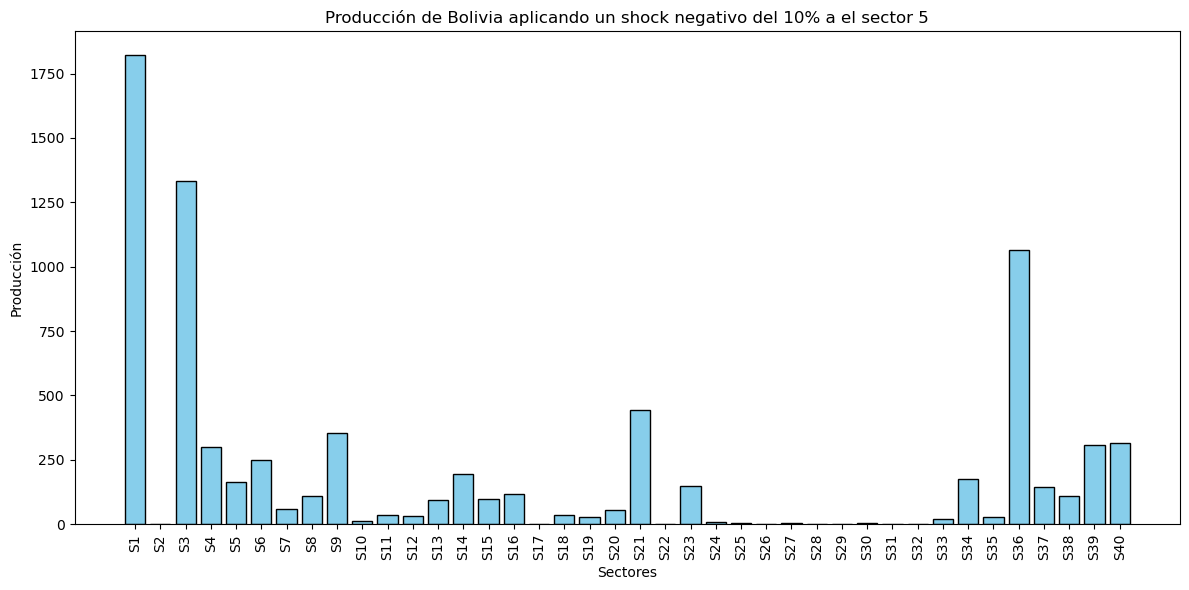

In [26]:
crear_grafico_barras(P_b_con_shock_negativo, "negativo del 10% a el sector 5")

Definimos tambien una función para graficar comparaciones entre vectores de producción.

In [ ]:
def crear_barras_superpuestas(vectores_produccion, etiquetas_vectores, titulo="Comparación de Producción entre Sectores aplicando distintos shocks"):
    """
    Función que crea un gráfico de barras superpuestas para comparar tres vectores de producción.
    
    Parámetros
    ----------
    vectores_produccion: Lista de tres vectores de producción.
    etiquetas_vectores: Etiquetas para cada vector de producción.
    titulo: Título del gráfico.
    
    """
    n_vectores = len(vectores_produccion)
    sectores = [f'S{i+1}' for i in range(len(vectores_produccion[0]))]
    n_sectores = len(sectores)
    
   
    x = np.arange(n_sectores)  
    width = 0.25  
    
    plt.figure(figsize=(12, 6))
    
    for i, vector in enumerate(vectores_produccion):
        plt.bar(x + i*width, vector, width=width, label=etiquetas_vectores[i])
    
    
    plt.xlabel('Sectores')
    plt.ylabel('Producción')
    plt.title(titulo)
    plt.xticks(x + width, sectores, rotation=90)
    plt.legend()
    
    
    plt.tight_layout()
    
   
    plt.show()

Realizamos un gráfico de barras para comparar visualmente cómo varia la producción sector por sector, luego de aplicar el shock negativo.

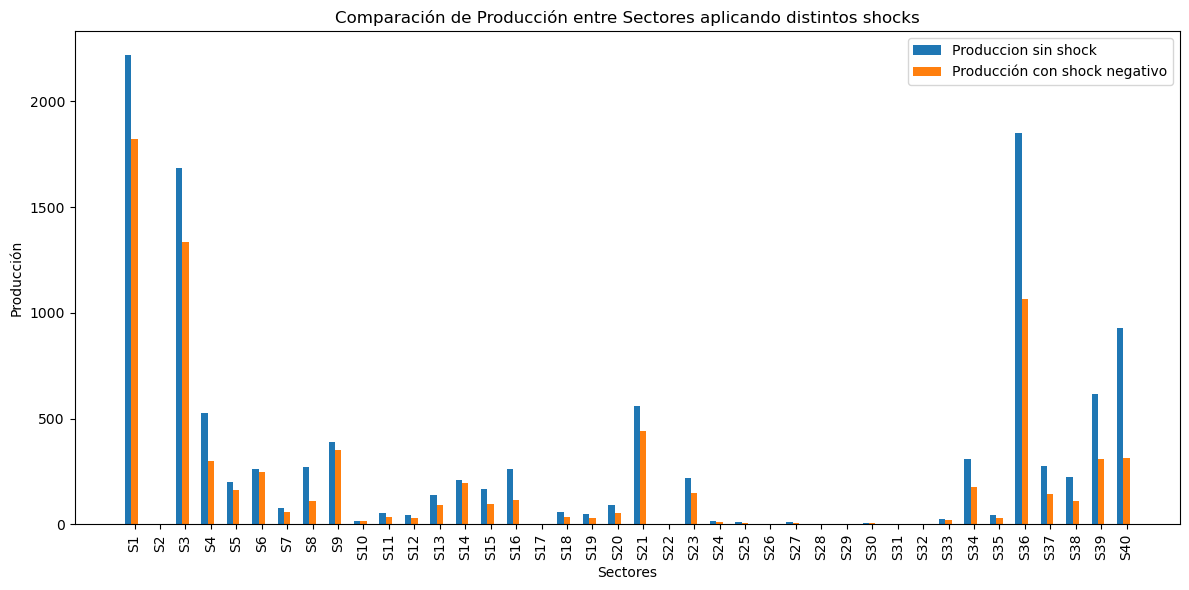

In [67]:
comparacionMC1 = crear_barras_superpuestas([P_b, P_b_con_shock_negativo], ['Produccion sin shock','Producción con shock negativo'])
comparacionMC1

Observamos que casi todos los sectores sufren una caída en la producción producto de una disminución del 10% en la demanda sobre el sector 5. Se destacan las caídas en los sectores 8, 16, 39 y 40 como las más grandes (en términos porcentuales) a simple vista. Esto muestra una interdependencia entre estos sectores y los sectores a los cuales se les aplica el shock en la demanda.

### Simular un shock positivo del 3.3% del total de cada uno de los siguientes sectores: $S_6$, $S_7$ y $S_8$

El procedimiento es el mismo que para el caso del shock negativo, solo que ahora nuestro vector ${d^b}'$ contempla las variaciones en la demanda de los sectores 6, 7 y 8

In [28]:
delta_sector6 = calcular_delta_D(D_b, 0.033, 6)
delta_sector7 = calcular_delta_D(D_b, 0.033, 7)
delta_sector8 = calcular_delta_D(D_b, 0.033, 8)

d_b_prima2 = D_b + delta_sector6 + delta_sector7 + delta_sector8

Una vez que tenemos el ${d^b}'$ podemos aplicar la función del modelo complejo para el shock positivo.

In [29]:
P_b_con_shock_positivo = modelo_complejo(matriz_Abb, matriz_Abs, matriz_Ass, matriz_Asb, d_b_prima2)

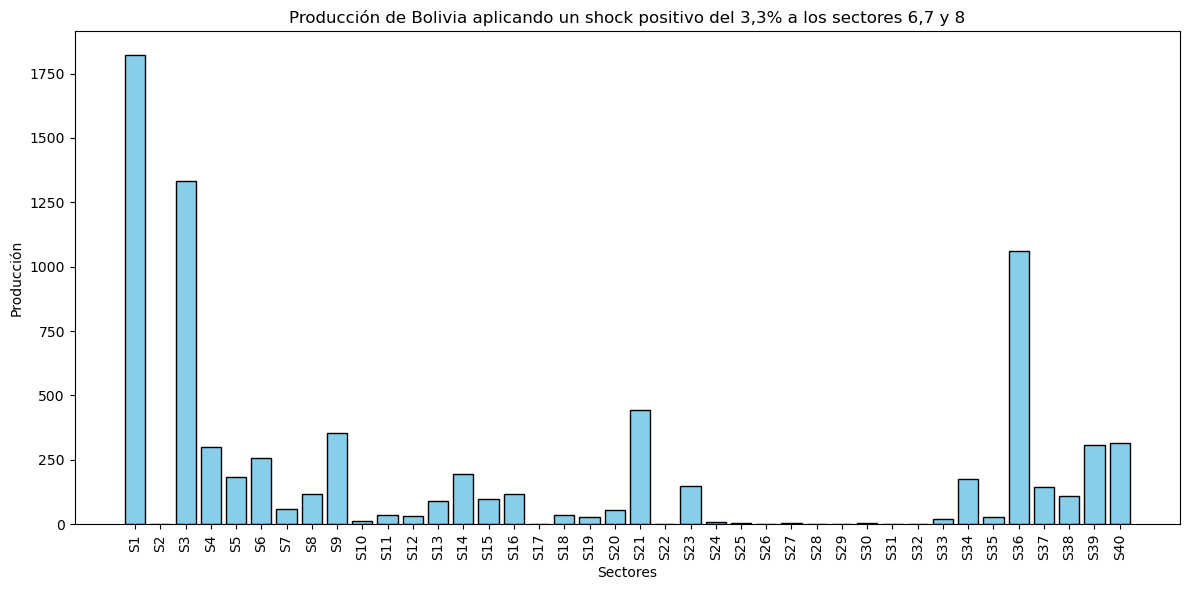

In [30]:
crear_grafico_barras(P_b_con_shock_positivo, "positivo del 3,3% a los sectores 6,7 y 8")

Realizamos un gráfico de barras para comparar visualmente como varia la producción sector por sector, luego de aplicar el shock positivo.

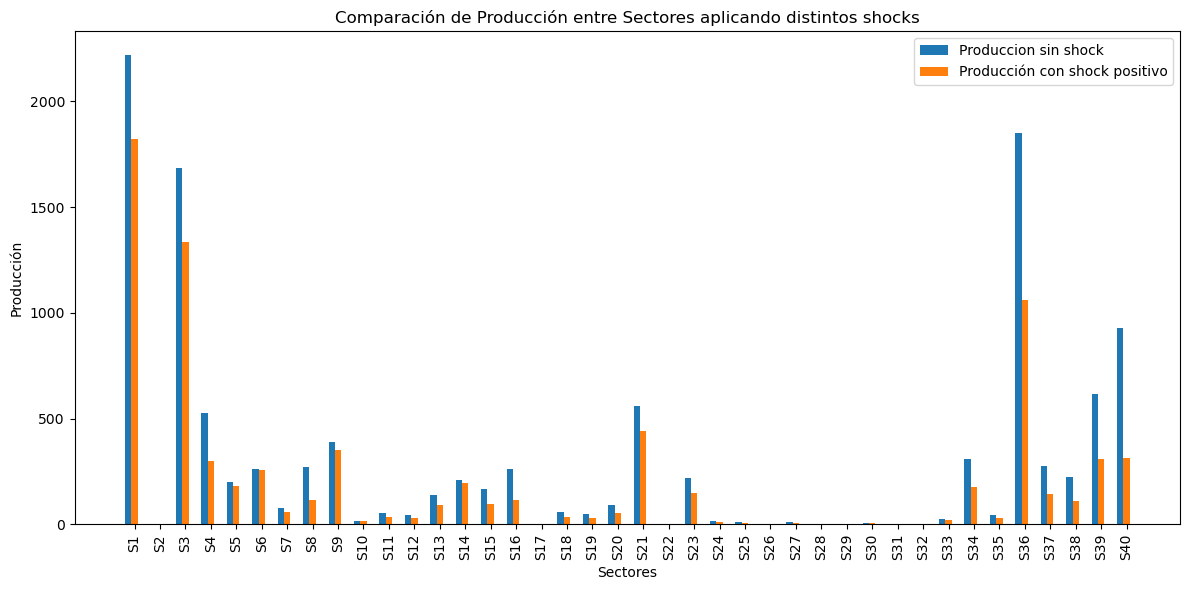

In [68]:
comparacionMC2 = crear_barras_superpuestas([P_b, P_b_con_shock_positivo], ['Produccion sin shock','Producción con shock positivo'])
comparacionMC2

Como en el caso anterior, observamos que casi todos los sectores sufren una caída en la producción producto de un aumento en la demanda del 3.3% sobre los sectores 6, 7 y 8, lo que muestra una interdependencia entre estos sectores y los sectores a los cuales se les aplica el shock en la demanda. El comportamiento es muy similar al que ocurre al aplicar el shock negativo.

## Variación en producción cuando se considera el modelo de region simple

### Simular un shock negativo sobre el sector $S_5$ del 10% del total del sector,  un shock positivo del 3.3% del total de cada uno de los siguientes sectores: $S_6$, $S_7$ y $S_8$

Realizamos el mismo procedimiento que cuando consideramos el modelo con las dos regiones, pero en este caso nuestra nueva producción ${p^r}'$ viene dada por la ecuación:\
\
$${p^b}' = (I − A^{bb})^{−1}{d^{b}}'$$\
\
La cual solo considera una región.

In [31]:
#Ecuacion 5
def modelo_simple(Abb, demanda):
    """
    Modelo de región simple. Función que calcula la 
    producción dada por la ecuacion 5.
    
    Parámetros
    ----------
    Abb : Matriz intrarregional de Bolivia
    demanda: nueva demanda luego de un shock aplicado
    
    Returns
    --------
    
    P_b : La variación de la producción
    
    """
    I = np.eye(Abb.shape[0])
    temp = I - Abb
    L,U,P = calcular_LU(temp)
    inv = inversa_LU(L, U, P)
    P_b = inv @ demanda
    return P_b

Calculamos ${p^b}'$ utilizando ${d^b}'$ dada por el shock negativo en el sector 5.

In [32]:
#vector de produccion luego de reducir la demanda en el sector 5
P_b_modelo_simple_shock_negativo = modelo_simple(matriz_Abb, d_b_prima)


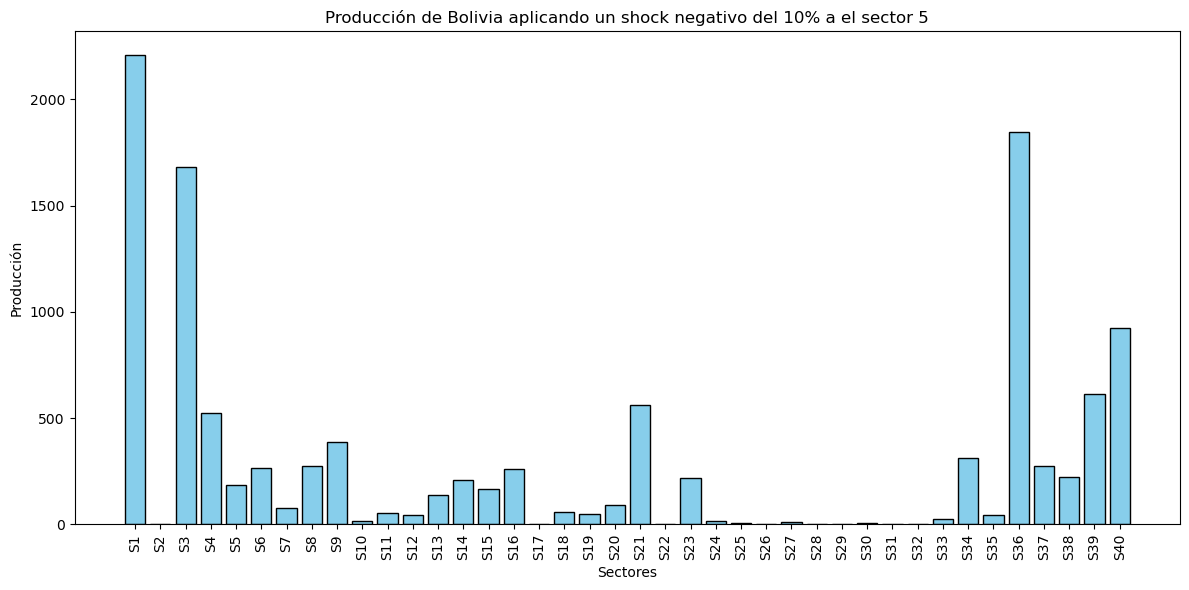

In [33]:
#grafico de produccion por sector luego de reducir la demanda en el sector 5
crear_grafico_barras(P_b_modelo_simple_shock_negativo, "negativo del 10% a el sector 5")

### Comparación de la producción con y sin shock negativo, según el modelo simple.

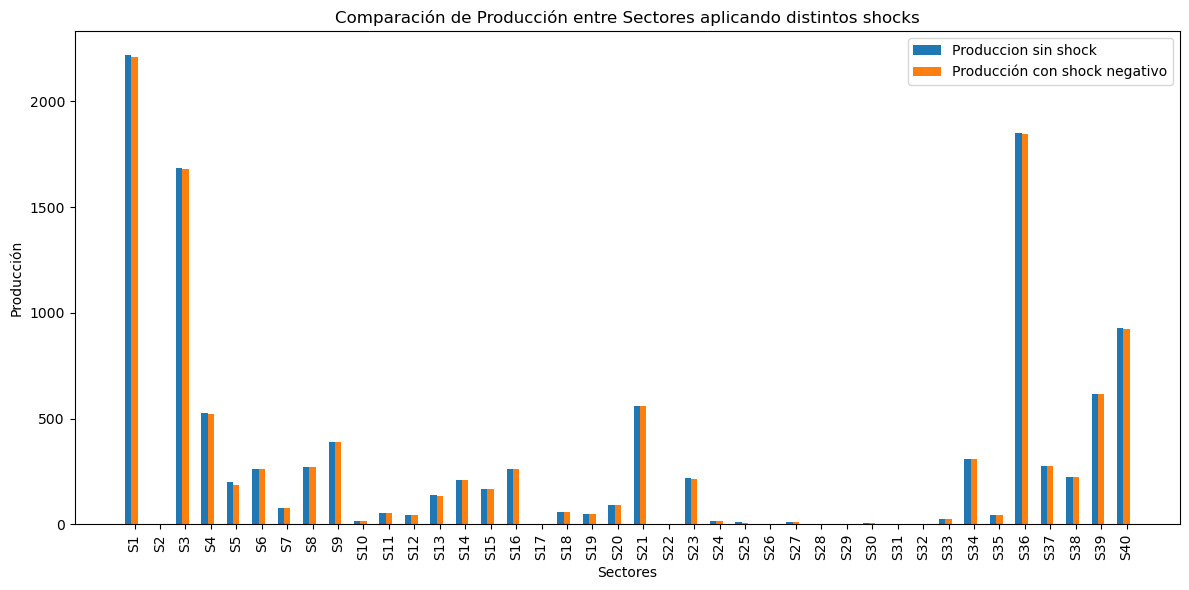

In [69]:
comparacionMS1 = crear_barras_superpuestas([P_b, P_b_modelo_simple_shock_negativo], ['Produccion sin shock','Producción con shock negativo'])
comparacionMS1

Se observa que el comportamiento es el mismo en el sentido de la disminucion de la produccion en la mayoria de los sectores. En este caso la diferencia es notable con respecto a la magnitud de las caidas. Se explica la diferencia por la utilizacion de un modelo simple, que no tiene en cuenta ambas regiones. Al incluir tambien las relaciones entre ambas regiones, se profundizan los efectos del shock en la caida de la produccion de cada sector. 

Calculamos ${p^b}'$ utilizando ${d^b}'$ dada por el shock positivo en los sectores 6, 7 y 8

In [34]:
#vector de produccion luego de aumentar la demanda en los sectores 6, 7, y 8.
P_b_modelo_simple_shock_positivo = modelo_simple(matriz_Abb, d_b_prima2)

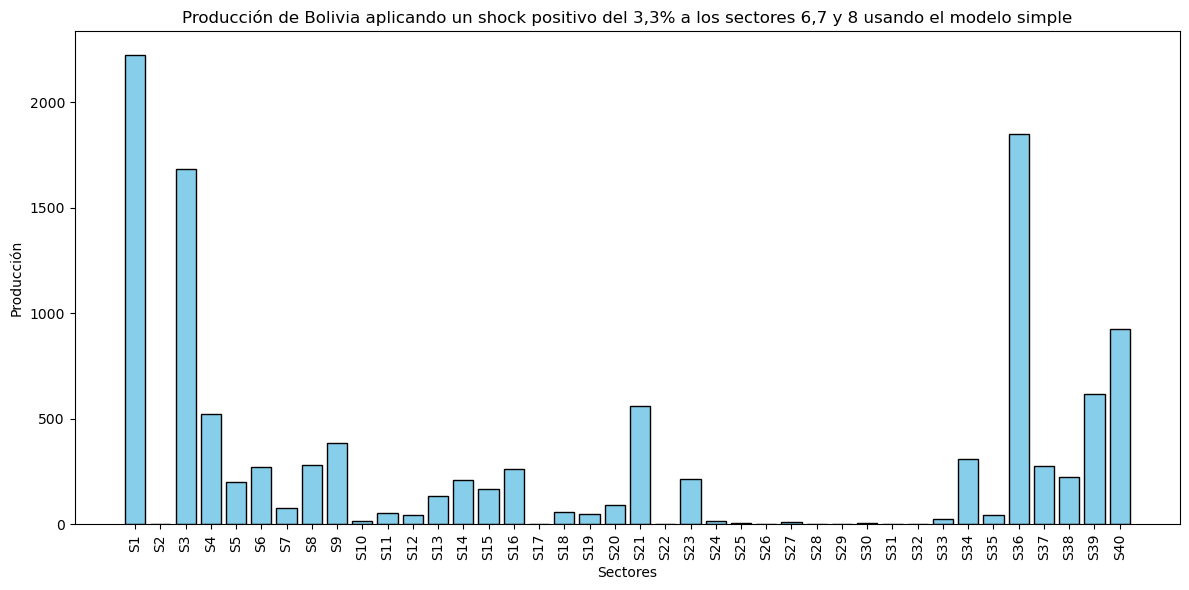

In [35]:
#grafico de produccion por sector luego de aumentar la demanda en los sectores 6, 7, y 8.
crear_grafico_barras(P_b_modelo_simple_shock_positivo, "positivo del 3,3% a los sectores 6,7 y 8 usando el modelo simple")

### Comparación de la producción con y sin shock positivo, según el modelo simple.

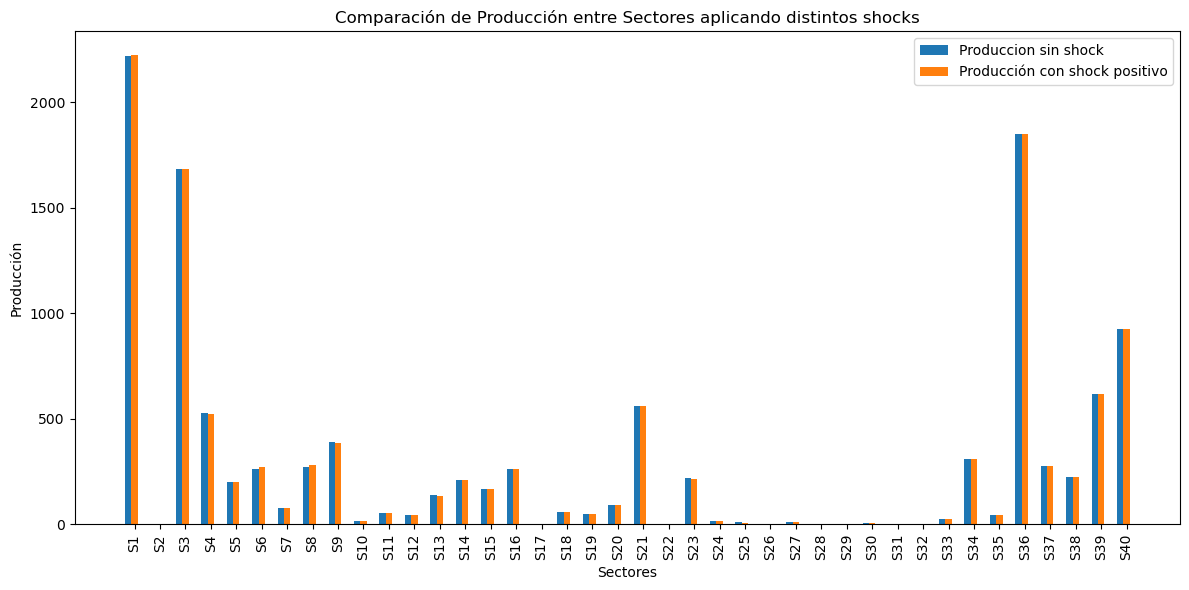

In [70]:
comparacionMS2 = crear_barras_superpuestas([P_b, P_b_modelo_simple_shock_positivo], ['Produccion sin shock','Producción con shock positivo'])
comparacionMS2

Al calcular la producción según el modelo de una región, se observa que esta aumenta levemente en algunos sectores, como el 1 y el 6. Sin embargo, también se aprecia una leve caída en la producción de otros sectores, como el 4, 9, 13 y 23, mientras que un tercer grupo de sectores no parece verse afectado en sus niveles de producción.

### Ahora realizamos gráficos para apreciar como cambia la producción cuando usamos un modelo u otro.

In [72]:
def crear_barras_superpuestas2(vectores_produccion, etiquetas_vectores, ax, titulo="Comparación de Producción entre Sectores aplicando distintos shocks"):
    """
    Función que crea un gráfico de barras superpuestas para comparar vectores de producción en un eje específico (ax).
    
    Parámetros
    ----------
    vectores_produccion: Lista de vectores de producción.
    etiquetas_vectores: Etiquetas para cada vector de producción.
    ax: Eje donde se dibujará el gráfico.
    titulo: Título del gráfico.
    """
    sectores = [f'S{i+1}' for i in range(len(vectores_produccion[0]))]
    n_sectores = len(sectores)
    x = np.arange(n_sectores)  
    width = 0.25 
    
    for i, vector in enumerate(vectores_produccion):
        ax.bar(x + i*width, vector, width=width, label=etiquetas_vectores[i])
    
    ax.set_xlabel('Sectores')
    ax.set_ylabel('Producción')
    ax.set_title(titulo)
    ax.set_xticks(x + width)
    ax.set_xticklabels(sectores, rotation=90)
    ax.legend()

### Comparación del efecto del shock **NEGATIVO** usando el modelo complejo (izquierda) y simple (derecha).

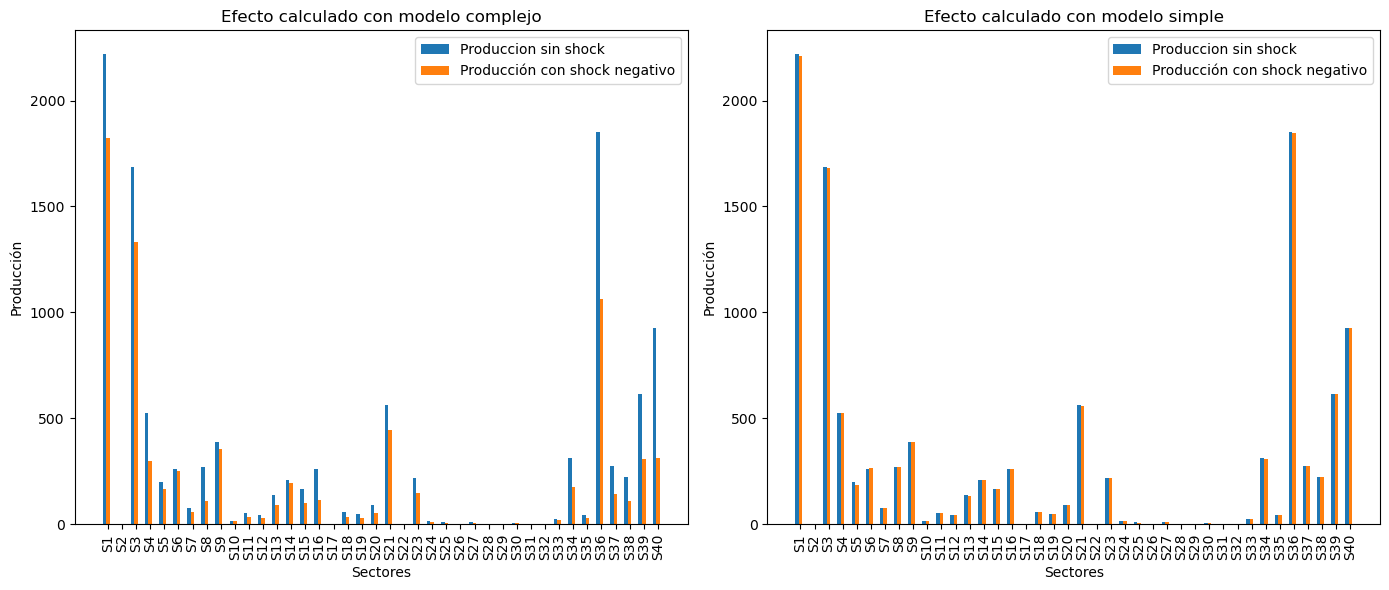

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

crear_barras_superpuestas2([P_b, P_b_con_shock_negativo], ['Produccion sin shock','Producción con shock negativo'],axs[0],titulo = "Efecto calculado con modelo complejo" )

crear_barras_superpuestas2([P_b, P_b_modelo_simple_shock_negativo], ['Produccion sin shock','Producción con shock negativo'],axs[1],titulo = "Efecto calculado con modelo simple")


plt.tight_layout()

plt.show()

Como mencionabamos anteriormente, el comportamiento es el mismo en el sentido de la disminución de la producción en la mayoría de los sectores. Se nota una diferencia notable respecto de la magnitud de las caidas.

#### Comparacion del efecto del shock **POSITIVO** usando el modelo complejo (izquierda) y simple (derecha).

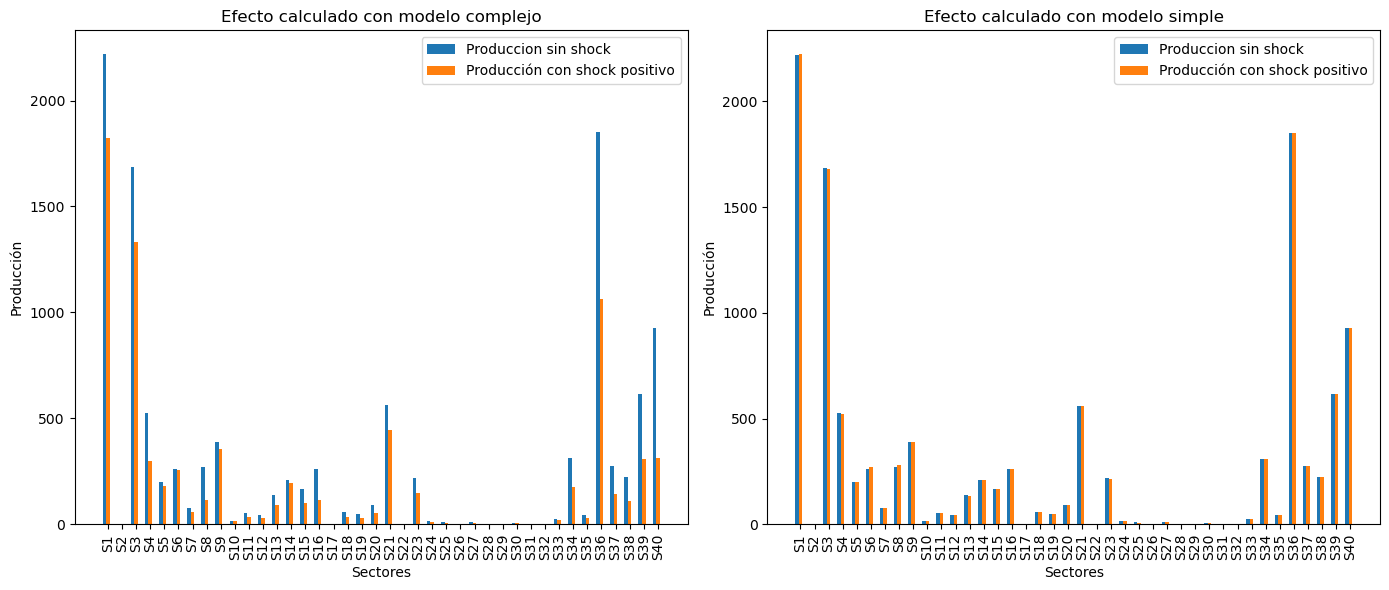

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

crear_barras_superpuestas2([P_b, P_b_con_shock_positivo], ['Produccion sin shock','Producción con shock positivo'],axs[0],titulo = "Efecto calculado con modelo complejo" )

crear_barras_superpuestas2([P_b, P_b_modelo_simple_shock_positivo], ['Produccion sin shock','Producción con shock positivo'],axs[1],titulo = "Efecto calculado con modelo simple")


plt.tight_layout()

plt.show()

En esta comparación se ve que, al tener en cuenta solo los efectos de una sola región, además de una gran disminución en la magnitud de las caídas, algunos sectores reflejan incluso un aumento en los niveles de producción. 

Podemos concluir que un modelo de región doble analiza dos regiones interconectadas, lo que implica que un shock en la demanda en una región no solo afecta su propia producción, sino que también genera efectos indirectos sobre la producción de la otra región a través de las interdependencias comerciales y económicas entre ambas. En este tipo de modelo, las interacciones entre regiones amplifican o mitigan los efectos del shock en función de la magnitud y dirección de los flujos económicos entre ellas, lo que genera resultados más complejos y realistas sobre el impacto en la producción.